<a href="https://colab.research.google.com/github/Qais-Hweidi/component-labeling-algorithm/blob/main/component_labeling_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use instructions:
- "image_path" input image path, "min_val" & "max_val" min and max intinsity levels, "size_threshold" for size filter. You can change these values in the code as you wish.
- The output will always be 5 images, first one is the original.
- You should input a binary image for task 1, 2 and 4, the correct output is "4-Connectivity" & "8-Connectivity" & "After Size Filter" pictures, ignore all other output pictures.
- You should input a grayscale image for task 3, the correct output is "4-Connectivity with Intensity Range" picture, ignore all other output pictures.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of components (4-connectivity with intensity range): 2
Number of components (4-connectivity): 1
Number of components (8-connectivity): 1


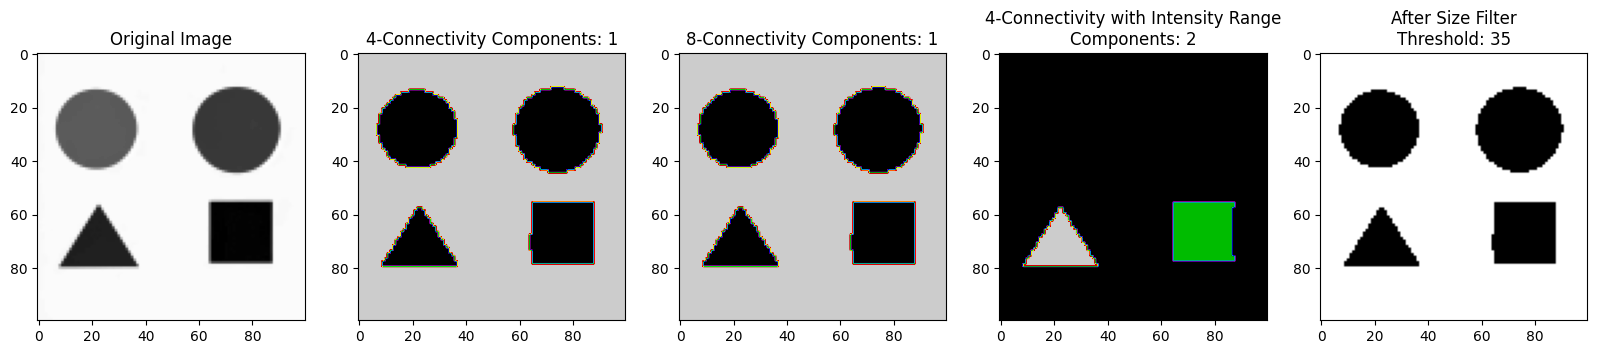

In [ ]:
# Qais Hweidi
# Run this code on Google Colab

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


def component_labeling(binary_image, connectivity=4):
    # Initialize labels and equivalence table
    current_label = 1
    equivalence = {}

    # Get shape of the image
    rows, cols = binary_image.shape

    # Create a labeled image initialized to zero
    labels = np.zeros((rows, cols), dtype=int)

    # Define neighbor offsets for 4-con & 8-con
    if connectivity == 4:
        neighbor_offsets = [(-1, 0), (0, -1)]
    elif connectivity == 8:
        neighbor_offsets = [(-1, 0), (0, -1), (-1, -1), (-1, 1)]

    # Label the image and record equivalences
    for r in range(rows):
        for c in range(cols):
            if binary_image[r, c] == 1:
                neighbor_labels = []
                for dr, dc in neighbor_offsets:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < rows and 0 <= nc < cols and labels[nr, nc] != 0:
                        neighbor_labels.append(labels[nr, nc])

                if not neighbor_labels:
                    # Assign new label
                    labels[r, c] = current_label
                    equivalence[current_label] = current_label
                    current_label += 1
                else:
                    min_label = min(neighbor_labels)
                    labels[r, c] = min_label
                    for label in neighbor_labels:
                        if label != min_label:
                            equivalence[label] = min_label

    # Resolve equivalences
    for label in equivalence:
        while equivalence[label] != equivalence[equivalence[label]]:
            equivalence[label] = equivalence[equivalence[label]]

    # Relabel image with resolved labels
    for r in range(rows):
        for c in range(cols):
            if labels[r, c] != 0:
                labels[r, c] = equivalence[labels[r, c]]

    # Count unique labels
    unique_labels = np.unique(labels[labels > 0])
    num_components = len(unique_labels)

    return num_components, labels

################################################################################

def component_labeling_with_intensity_range(gray_image, min_val, max_val):

    binary_image = np.where((gray_image >= min_val) & (gray_image <= max_val), 1, 0)

    num_components_4, labeled_image_4 = component_labeling(binary_image, connectivity=4)

    return num_components_4, labeled_image_4

################################################################################

def size_filter(labels, threshold):
    # Get the labels and their counts
    unique_labels, counts = np.unique(labels, return_counts=True)

    # Compare the count with threshold
    for label, count in zip(unique_labels, counts):
        if label == 0:
            continue
        if count < threshold:
            labels[labels == label] = 0

    return labels


################################################################################

# Using the functions and displaying the output on a plot

image_path = "/content/drive/MyDrive/ColabNotebooks1/binaryTest.png"  # Change the path of the input image here
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

min_val = 1  # Change min intensity value here
max_val = 80  # Change max intensity value here

# Intensity range
num_components_4_intensity, labeled_image_4_intensity = component_labeling_with_intensity_range(gray_image, min_val, max_val)
print(f"Number of components (4-connectivity with intensity range): {num_components_4_intensity}")

# 4-con
binary_image = cv2.threshold(gray_image, 127, 1, cv2.THRESH_BINARY)[1]
num_components_4, labeled_image_4 = component_labeling(binary_image, connectivity=4)
print(f"Number of components (4-connectivity): {num_components_4}")

# 8-con
num_components_8, labeled_image_8 = component_labeling(binary_image, connectivity=8)
print(f"Number of components (8-connectivity): {num_components_8}")

# size filter
size_threshold = 35  # Change size threshold here
filtered_image_4 = size_filter(labeled_image_4, size_threshold)



# Display the outputs
plt.figure(figsize=(20, 6))

#1 Original image
plt.subplot(1, 5, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")

#2 Component labeling for 4-con
plt.subplot(1, 5, 2)
plt.imshow(labeled_image_4, cmap='nipy_spectral')
plt.title(f"4-Connectivity Components: {num_components_4}")

#3 Component labeling for 8-con
plt.subplot(1, 5, 3)
plt.imshow(labeled_image_8, cmap='nipy_spectral')
plt.title(f"8-Connectivity Components: {num_components_8}")

#4 Component labeling with intensity
plt.subplot(1, 5, 4)
plt.imshow(labeled_image_4_intensity, cmap='nipy_spectral')
plt.title(f"4-Connectivity with Intensity Range\nComponents: {num_components_4_intensity}")

#5 Size filter
plt.subplot(1, 5, 5)
plt.imshow(filtered_image_4, cmap='gray')
plt.title(f"After Size Filter\nThreshold: {size_threshold}")

plt.show()